In [2]:
# parameters
length = 500
transition_noise = 0.1
obs_noise = 1.0

In [3]:
# simulate data
import numpy as np
x_true = []
y_true = []
x_last = 0
for i in range(length):
    x_true.append(x_last + transition_noise * np.random.randn())
    x_last = x_true[-1]
    y_true.append(x_last + obs_noise * np.random.randn())

x_true = np.array(x_true)
y_true = np.array(y_true)

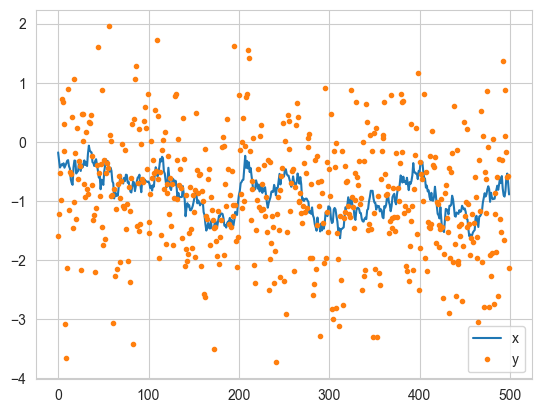

In [4]:
from matplotlib import pyplot as plt
plt.plot(x_true,label='x')
plt.plot(y_true,'.',label='y')
plt.legend();

In [6]:
import pangolin as pg
x0 = pg.makerv(0.5)
noise = pg.makerv(transition_noise)
x = pg.autoregressive(lambda last: pg.normal(last, noise), length)(x0)
#x = pg.autoregressive(lambda last: pg.exponential(last), length)(x0)
pg.interface.print_upstream(x)
#samps = pg.sample_flat(x)
#samps = pg.inference.numpyro.sample(x)
y = pg.vmap(pg.normal,[0,None])(x,obs_noise)
#mu = pg.E(x,y,y_true)
samps = pg.inference.numpyro.sample(x,y,y_true)
#samps

other_shapes=()
base_input_shapes=[]
base_input_shapes=[()]
other_shapes=()
base_input_shapes=[]
base_input_shapes=[()]
ops=(Normal(),)
NONE
other_shapes=((),)
base_input_shapes=[()]
base_input_shapes=[(), ()]
shape  | statement
------ | ---------
()     | a = 0.5
()     | b = 0.1
(500,) | c ~ autoregressive(composite(2,(Normal(),),((0, 1),)),500,(None,),0)(a,b)
NONE
other_shapes=((),)
base_input_shapes=[()]
base_input_shapes=[(), ()]
NONE
other_shapes=((),)
base_input_shapes=[()]
base_input_shapes=[(), ()]


IndexError: tuple index out of range

In [ ]:
mu = np.mean(samps,axis=0)
lo = np.percentile(samps,2.5,axis=0)
hi = np.percentile(samps,97.5,axis=0)

plt.plot(y_true,'.',label='y')
plt.plot(x_true,label='x')
l = plt.plot(mu,label='mu')
plt.fill_between(np.arange(len(lo)),lo,hi,color=l[0].get_color(),edgecolor='none',alpha=0.25)
                                                                           #'label='95%
# interval',
#plt.plot(hi,label='hi')
plt.legend();

In [ ]:
l[0].get_color()

In [ ]:
hi